In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Analysis_file.csv",low_memory = False, index_col='Respondent')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51392 entries, 1 to 51392
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Professional             51392 non-null  object 
 1   ProgramHobby             51392 non-null  object 
 2   Country                  51392 non-null  object 
 3   University               51392 non-null  object 
 4   EmploymentStatus         51392 non-null  object 
 5   FormalEducation          51392 non-null  object 
 6   MajorUndergrad           42841 non-null  object 
 7   YearsCodedJob            40891 non-null  object 
 8   DeveloperType            36125 non-null  object 
 9   NonDeveloperType         4891 non-null   object 
 10  CareerSatisfaction       42695 non-null  float64
 11  JobSatisfaction          40376 non-null  float64
 12  ProblemSolving           31293 non-null  object 
 13  LearningNewTech          31304 non-null  object 
 14  JobSecurity           

In [4]:
df.head(2)

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,YearsCodedJob,DeveloperType,NonDeveloperType,...,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Gender,HighestEducationParents,Salary,ExpectedSalary
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,.,...,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,Male,High school,NaN,NaN
2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,NaN,NaN,NaN,...,MySQL; SQLite,MySQL; SQLite,Amazon Web Services (AWS),Linux Desktop; Raspberry Pi; Amazon Web Servic...,Atom; Notepad++; Vim; PyCharm; RubyMine; Visua...,"Put on some ambient sounds (e.g. whale songs, ...",Male,A master's degree,NaN,37500.0


## Imputing 'YearsCodedJob' Column

In [5]:
df['YearsCodedJob'].unique()

array([nan, '20 or more years', '9 to 10 years', '10 to 11 years',
       '8 to 9 years', '7 to 8 years', '11 to 12 years', '17 to 18 years',
       '15 to 16 years', '1 to 2 years', '3 to 4 years', '12 to 13 years',
       'Less than a year', '5 to 6 years', '16 to 17 years',
       '13 to 14 years', '6 to 7 years', '2 to 3 years', '4 to 5 years',
       '14 to 15 years', '18 to 19 years', '19 to 20 years'], dtype=object)

In [6]:
def decrease_ycj_cat(x):
    if(x == '1 to 2 years' or x == '2 to 3 years' or x == '3 to 4 years'or x== '4 to 5 years'):
        return '1 to 5 years'
    
    elif(x == '5 to 6 years' or x == '6 to 7 years'or x== '7 to 8 years' or x == '8 to 9 years' or x== '9 to 10 years' ):
        return '5 to 10 years'
    
    elif(x == '10 to 11 years' or x=='11 to 12 years' or x=='12 to 13 years' or x== '13 to 14 years'or x=='14 to 15 years' ):
        return '10 to 15 years'
    
    elif(x=='15 to 16 years'or x== '16 to 17 years'or x=='17 to 18 years'or x== '18 to 19 years'or x=='19 to 20 years'):
        return '15 to 20 years'
    
    else:
        return x

In [7]:
df["YearsCodedJob"] = df["YearsCodedJob"].apply(decrease_ycj_cat)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='YearsCodedJob', ylabel='count'>

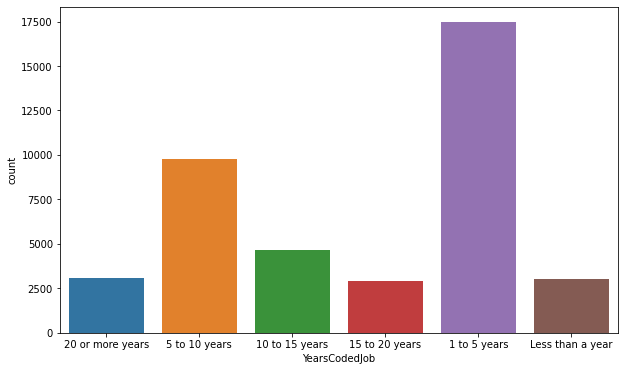

In [8]:
plt.figure(figsize =(10,6))
sns.countplot(df["YearsCodedJob"])

## Imputing 'Salary' Column

In [9]:
df['Salary'].count()

12891

In [10]:
df['YearsCodedJob'].dropna().unique()

array(['20 or more years', '5 to 10 years', '10 to 15 years',
       '15 to 20 years', '1 to 5 years', 'Less than a year'], dtype=object)

In [11]:
avg_salary = dict()
for x in df['YearsCodedJob'].dropna().unique():
    avg_salary[x] = df[df['YearsCodedJob']==x]['Salary'].mean()

In [12]:
avg_salary

{'20 or more years': 98128.09747715942,
 '5 to 10 years': 58476.291496972044,
 '10 to 15 years': 74247.61223478807,
 '15 to 20 years': 82861.66052403767,
 '1 to 5 years': 41404.73031190065,
 'Less than a year': 33298.75204458006}

In [13]:
def impute_Salary(cols):
    Salary = cols[0]
    ycj = cols[1]
    
    if(pd.isnull(Salary)):
        if(pd.notnull(ycj)):
            return avg_salary[ycj]
    return Salary

In [14]:
df['Salary'] = df[["Salary","YearsCodedJob"]].apply(impute_Salary,axis=1)

In [15]:
df['Salary'].count()

40948

In [18]:
df[['YearsCodedJob','Salary']].head(10)

,YearsCodedJob,Salary
Respondent,,
1,NaN,NaN
2,NaN,NaN
3,20 or more years,113750.000000
4,5 to 10 years,58476.291497
5,10 to 15 years,74247.612235
6,NaN,NaN
7,5 to 10 years,58476.291497
8,5 to 10 years,58476.291497
9,5 to 10 years,58476.291497


### -------------------------------- Assess col  analysis ---------------------------------------------

In [18]:
df['AssessJobIndustry'].unique()

array(['Very important', nan, 'Somewhat important', 'Important',
       'Not very important', 'Not at all important'], dtype=object)

In [19]:
df.iloc[:,20:34]

,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances
Respondent,,,,,,,,,,,,,,
1,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Somewhat important,Somewhat important,Somewhat important,Important,Important,Very important,Important,Very important,Important,Somewhat important,Very important,Important,Very important,Very important
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51388,Important,Somewhat important,Important,Somewhat important,Important,Not very important,Very important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Somewhat important,Important
51389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def assess_score(cols):
    score = 0
    
    for x in cols:
        if pd.isnull(x):
            score += 0
        elif x == 'Not at all important':
            score += 0.5
        elif x == 'Not very important':
            score += 1
        elif x == 'Somewhat important':
            score += 1.5
        elif x == 'Important':
            score += 2
        else:
            score += 2.5
                    
    return score

In [21]:
temp = df.iloc[:,20:34].apply(assess_score,axis=1)

In [22]:
temp[:5]

Respondent
1    30.5
2     0.0
3     0.0
4    28.5
5     0.0
dtype: float64

In [23]:
df['Access_Scoring']=temp

In [24]:
#temp=df.iloc[:,20:34]

In [25]:
temp=df.drop(df.iloc[:,20:34],axis=1)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51392 entries, 1 to 51392
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Professional             51392 non-null  object 
 1   ProgramHobby             51392 non-null  object 
 2   Country                  51392 non-null  object 
 3   University               51392 non-null  object 
 4   EmploymentStatus         51392 non-null  object 
 5   FormalEducation          51392 non-null  object 
 6   MajorUndergrad           42841 non-null  object 
 7   YearsCodedJob            40891 non-null  object 
 8   DeveloperType            36125 non-null  object 
 9   NonDeveloperType         4891 non-null   object 
 10  CareerSatisfaction       42695 non-null  float64
 11  JobSatisfaction          40376 non-null  float64
 12  ProblemSolving           31293 non-null  object 
 13  LearningNewTech          31304 non-null  object 
 14  JobSecurity           

In [26]:
df[df['Access_Scoring']!=0]['Access_Scoring'].count()

22689